# Assignment 1

#### Due: 4/19/2021

<img align="right" width="400" height="200" src="among_us.png">

The file `data.csv` contains data on wins for 1,500 different players for the computer game Among Us. A win is indicated as y=1, otherwise y=0. The player index is the second column ("player"). Some players have played many games - others have played fewer games. For example, the first player has played 24 games (and won 12), whereas player 3 has played 35 games (and won 18). In this assignment you are asked to try to make statements about each of the 1,500 players abilities. 

Assume for simplicity that each player's ability is fixed (so there is no learning), and that player $i$'s  win probability is only a function of player $i$'s ability. We will define ability on the logit scale so that player $i$'s win probability in game $j$ is 

$$
{\rm Pr}(Y_{ij}=1|\alpha_i) = \frac{ \exp(\alpha_i)}{ 1.0 + \exp(\alpha_i)}, \qquad j=1,\dots,N_i.
$$

Note 1: This is synthetic (i.e., simulated) data - so in this case we know each player’s actual latent ability.

Note 2: You can use any software you wish to solve this assignment (Python, R, Julia, Excel (just kidding - please don’t use Excel….) )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stan

ModuleNotFoundError: No module named 'stan'

## Question 1

Let's start by using a simple **ad-hoc** estimate of each player's ability. Let $\bar y_i \in [0,1]$ be player $i$'s observed win ratio (e.g., 0.21). Then a simple estimate of player $i$'s ability is the $\hat \alpha_i$ that solves 

$$
\bar y_i = \frac{ \exp(\hat \alpha_i)}{ 1.0 + \exp(\hat \alpha_i)}
$$

Using this estimate, find the top 10 worst players and their estimated ability.

In [3]:
#Code Here
dat = pd.read_csv('data.csv')

In [4]:
temp_list = []
for i in range(1, 1501):

    yBar = np.mean(dat[dat['player'] == i].y)
    alphaEst = np.log(yBar / (1 - yBar))
    temp_list.append(alphaEst)

# res is the dataframe collects all the estimated alpha
res_Q1 = pd.DataFrame(temp_list, columns=['estimated alpha'])
res_Q1.index += 1
res_Q1


/var/folders/hn/l61q_f8s7nlgg9ybvy7tmlx40000gn/T/ipykernel_66786/1266944420.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  alphaEst = np.log(yBar / (1 - yBar))


,estimated alpha
1,0.000000
2,-0.182322
3,0.057158
4,0.998529
5,-0.405465
...,...
1496,-0.587787
1497,-0.693147
1498,-0.287682
1499,0.773190


In [5]:
# find the worst 10: player has lowest yBar therefore estimated alpha approaches -inf
res_Q1.nsmallest(10, 'estimated alpha')

,estimated alpha
1161,-2.833213
1275,-2.268684
1015,-2.036882
817,-2.014903
1177,-2.014903
1302,-1.897120
1337,-1.860752
145,-1.791759
782,-1.722767
226,-1.686399


## Question 2

Can you think of a potential problem with the $\hat \alpha_i$ estimate above? (Hint: try to look at the top 10 **best** players rather than the top 10 worst)

In [6]:
#Code Here

# find the best 10: player has lowest yBar therefore estimated alpha approaches inf
res_Q1.nlargest(10, 'estimated alpha')


,estimated alpha
499,inf
698,2.708050
541,2.100061
512,2.079442
415,2.014903
594,2.014903
37,1.992430
1026,1.909543
1385,1.871802
63,1.791759


In [7]:
#Explanation Here

# We found the estimated alpha for No. 499 player is inf, which means that this player wins all game. 
# And therfore in this model, we would consider this player will continue playing like this. 

## Question 3

Since this is synthetic data, we can compare the estimates in Question 1 to the true correct abilities $\lbrace \alpha_i \rbrace_{i=1}^{1500}$. These can be found in the file `parameters.csv`.

### A

Create a scatter plot with the true abilities $\alpha_i$ on the x-axis and the estimated abilities $\hat \alpha_i$ on the y-axis. (Note: You can just drop the estimate for player 499). What would you say about these estimates? Do they track the true abilities well?

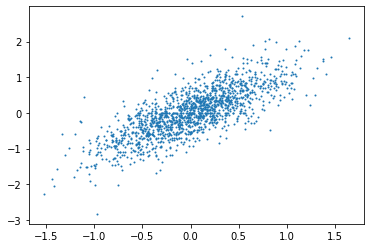

In [8]:
#Code Here
true_alpha = pd.read_csv('parameters.csv')
true_alpha.index += 1
true_alpha

x = true_alpha['alpha']
y = res_Q1['estimated alpha']
plt.scatter(x, y, s=1)
plt.show()

In [9]:
#Explanation Here

# As we can see, x and y are correlated. But there're also errors.

### B

Now divide all players into four groups depending on the number of games they have played: (1) <= 15 games, (2) 16 to 25 games, (3) 26 to 40 games and (4) more than 40 games.

Now redo the scatter plot above but ONLY for players in the lowest group (<= 15 games) and the highest group (more than 40 games). Indicate which group a player belongs to by two colors so you can separate them on the scatter plot. 

Which of the two groups have the smallest prediction errors?

In [10]:
#Code Here

temp_list = [] # records the number of games played by one person 
for i in range(1, 1501):

    cnt = dat[dat['player'] == i].count()[0]
    # print(cnt)
    temp_list.append(cnt)

# res is the dataframe collects all the estimated alpha
res_Q3B = pd.DataFrame(temp_list, columns=['numOfGames'])
res_Q3B.index += 1
res_Q3B

,numOfGames
1,24
2,22
3,35
4,26
5,15
...,...
1496,14
1497,15
1498,35
1499,19


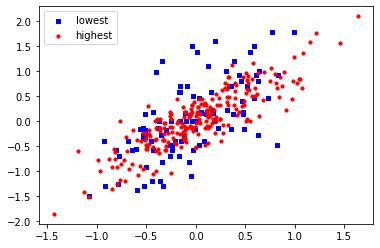

In [11]:
lowestGrp = res_Q3B[res_Q3B['numOfGames'] <= 15]
higestGrp = res_Q3B[res_Q3B['numOfGames'] > 40]

lowestGrpTrueAlpha = true_alpha.iloc[lowestGrp.index - 1]['alpha']
higestGrpTrueAlpha = true_alpha.iloc[higestGrp.index - 1]['alpha']

lowestGrpEstAlpha = res_Q1.iloc[lowestGrp.index - 1]['estimated alpha']
higestGrpEstAlpha = res_Q1.iloc[higestGrp.index - 1]['estimated alpha']


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(lowestGrpTrueAlpha, lowestGrpEstAlpha, s=10, c='b', marker="s", label='lowest')
ax1.scatter(higestGrpTrueAlpha, higestGrpEstAlpha, s=10, c='r', marker="o", label='highest')
plt.legend(loc='upper left')
plt.show()

In [12]:
#Explanation Here

# It's very clear that the lowest-game-played group has larger error.

### C

Define root mean square error (RMSE) as

$$
{\rm RMSE}(\hat \alpha) = \sqrt{ \frac{1}{N} \sum_{i=1}^N (\hat \alpha_i - \alpha_i )^2 }
$$

(1) Calculate the overall RMSE (for all players - except player 499) and (2) Calculate RMSE for each of the four observation groups (making sure to normalize by the correct group size)

In [13]:
#Code Here

allTrueAlpha = true_alpha['alpha'].drop([499])
allEstAlpha = res_Q1['estimated alpha'].drop([499])

allRMSE = np.sqrt((1 / allEstAlpha.count()) * np.sum((allEstAlpha - allTrueAlpha)**2))
allRMSE

0.42173176376516364

In [14]:
# (1) <= 15 games, (2) 16 to 25 games, (3) 26 to 40 games and (4) more than 40 games

# I think 499 is in group 1 so only drop 499 here.
Grp1 = res_Q3B[res_Q3B['numOfGames'] <= 15]
Grp1TrueAlpha = true_alpha.drop([499]).iloc[Grp1.index - 1]['alpha']
Grp1EstAlpha = res_Q1.drop([499]).iloc[Grp1.index - 1]['estimated alpha']
Grp1RMSE = np.sqrt((1 / Grp1EstAlpha.count()) * np.sum((Grp1EstAlpha - Grp1TrueAlpha)**2))
Grp1RMSE

0.4743288343103642

In [17]:
#Code Here

Grp2 = res_Q3B[(res_Q3B['numOfGames'] >= 16) & (res_Q3B['numOfGames'] <= 25)]
Grp2TrueAlpha = true_alpha.iloc[Grp2.index - 1]['alpha']
Grp2EstAlpha = res_Q1.iloc[Grp2.index - 1]['estimated alpha']
Grp2RMSE = np.sqrt((1 / Grp2EstAlpha.count()) * np.sum((Grp2EstAlpha - Grp2TrueAlpha)**2))
Grp2RMSE

0.46999101665794724

In [18]:
Grp3 = res_Q3B[(res_Q3B['numOfGames'] >= 26) & (res_Q3B['numOfGames'] <= 40)]
Grp3TrueAlpha = true_alpha.iloc[Grp3.index - 1]['alpha']
Grp3EstAlpha = res_Q1.iloc[Grp3.index - 1]['estimated alpha']
Grp3RMSE = np.sqrt((1 / Grp3EstAlpha.count()) * np.sum((Grp3EstAlpha - Grp3TrueAlpha)**2))
Grp3RMSE


0.39737490330821795

In [19]:
Grp4 = res_Q3B[res_Q3B['numOfGames'] >= 40]
Grp4TrueAlpha = true_alpha.iloc[Grp4.index - 1]['alpha']
Grp4EstAlpha = res_Q1.iloc[Grp4.index - 1]['estimated alpha']
Grp4RMSE = np.sqrt((1 / Grp4EstAlpha.count()) * np.sum((Grp4EstAlpha - Grp4TrueAlpha)**2))
Grp4RMSE

0.30363266029854524

## Question 4

Now let's try to learn about player's abilities using a Bayesian approach. We will use the following model:
$$
\begin{aligned}
{\rm Pr}(Y_{ij}=1|\alpha_i) & = \frac{ \exp(\alpha_i)}{ 1.0 + \exp(\alpha_i)}, \qquad j=1,\dots,N_i;~i=1,\dots,N, \\
\alpha_i|\mu,\sigma & \sim {\rm N}(\mu,\sigma^2), \qquad i=1,\dots,N,\\
\mu & \sim {\rm N}(0,5^2), \\
\sigma & \sim {\rm Cauchy}_+ (0,2.5).
\end{aligned}
$$

The parameters of the model are $\lbrace \alpha_i \rbrace_{i=1}^N,\mu,\sigma$ with $\mu$ being the overall mean ability and $\sigma$ determining the dispersion - and the amount of shrinkage applied to the $\alpha_i$'s towards $\mu$.

This model has been coded in the probabilistic language **Stan**  (see the model file `MLM_binomial.stan`). The model has already been trained - you do NOT need to re-train it for this assignment (although you can if you want - the script that was used to train the model is `run_stan.r`). The file `thetaDrawsM1.csv` contains the results. This file has three columns and 3,000,000 rows. The rows are 2,000 random draws from the posterior of each player's ability $\alpha_i$ (so 2,000*1,500 = 3 million in total). The first column is index for each draw (1 to 2000), then player index and finally the value of $\alpha_i$ for that draw.

### A

Calculate the posterior expectation of each $\alpha_i$ (hint: just take the average of the draws for each player) and find the top 10 worst players according to the posterior expectation of ability. Do you get the same 10 players as in Question 1?

In [10]:
#Code Here
# effe

In [11]:
#Explanation Here

### B

Now find the top 10 best players according to their posterior expected ability.

In [12]:
#Code Here

### C 
What happened to the "problem" player 499 from Question 2? What is the position of player 499 in terms of posterior expectation? Can you explain this player's new position? (Recall that this player had a perfect 100% win percentage - why is she not the number 1 player in the Bayes analysis?)

In [13]:
#Code Here

In [14]:
#Explanation Here

### D

Plot the Bayes estimates and the ad-hoc estimates $\hat \alpha_i$ on the Y-axis in a scatter plot with the true $\alpha_i$ on the X-axis (with two different colors for the two estimates so you can tell them apart). Which do you prefer?

In [15]:
#Code Here

In [16]:
#Answer/Explanation Here

### E

Calculate the overall RSME and the RMSE for each of the four observation count groups for the Bayes estimates. How do they compare to the RMSE for the ad-hoc estimates?

In [17]:
#Code here

In [18]:
#Code Here

In [19]:
#Explanation Here